<a href="https://colab.research.google.com/github/AlanGanem/MO444/blob/master/2021s2_mc886mo444_assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2021s2



In [1]:
# TODO: RA & Name 
print('178777: ' + 'Alan Motta Ganem')
print('RA2: ' + 'Nome2')

178777: Alan Motta Ganem
RA2: Nome2


## Objective: Predict cancer mortality rates for US counties. 

Explore **linear regression** alternatives and come up with the best possible model to the problems, avoiding overfitting. In particular, predict the **TARGET_deathRate** from their attributes.

## Dataset

These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov.  

The dataset contains the death rate and attributes of 3,047 counties.

Dataset Information: You should respect the following traininig/test split: 2042 training examples, and 305 test examples.

There are 33 attributes as follows: 

Data Dictionary

- 1: **avgAnnCount**: Mean number of reported cases of cancer diagnosed annually (a)

- 2: **avgDeathsPerYear**: Mean number of reported mortalities due to cancer (a)

- 3: **incidenceRate**: Mean per capita (100,000) cancer diagoses(a)

- 4: **medianIncome**: Median income per county (b)

- 5: **popEst2015**: Population of county (b)

- 6: **povertyPercent**: Percent of populace in poverty (b)

- 7: **studyPerCap**: Per capita number of cancer-related clinical trials per county (a)

- 8: **binnedInc**: Median income per capita binned by decile (b)

- 9: **MedianAge**: Median age of county residents (b)

- 10: **MedianAgeMale**: Median age of male county residents (b)

- 11: **MedianAgeFemale**: Median age of female county residents (b)

- 12: **Geography**: County name (b)

- 13: **AvgHouseholdSize**: Mean household size of county (b)

- 14: **PercentMarried**: Percent of county residents who are married (b)

- 15: **PctNoHS18_24**: Percent of county residents ages 18-24 highest education attained: less than high school (b)

- 16: **PctHS18_24**: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

- 17: **PctSomeCol18_24**: Percent of county residents ages 18-24 highest education attained: some college (b)

- 18: **PctBachDeg18_24**: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

- 19: **PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

- 20: **PctBachDeg25_Over**: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

- 21: **PctEmployed16_Over**: Percent of county residents ages 16 and over employed (b)

- 22: **PctUnemployed16_Over**: Percent of county residents ages 16 and over unemployed (b)

- 23: **PctPrivateCoverage**: Percent of county residents with private health coverage (b)

- 24: **PctPrivateCoverageAlone**: Percent of county residents with private health coverage alone (no public assistance) (b)

- 25: **PctEmpPrivCoverage**: Percent of county residents with employee-provided private health coverage (b)

- 26: **PctPublicCoverage**: Percent of county residents with government-provided health coverage (b)

- 27: **PctPubliceCoverageAlone**: Percent of county residents with government-provided health coverage alone (b)

- 28: **PctWhite**: Percent of county residents who identify as White (b)

- 29: **PctBlack**: Percent of county residents who identify as Black (b)

- 30: **PctAsian**: Percent of county residents who identify as Asian (b)

- 31: **PctOtherRace**: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

- 32: **PctMarriedHouseholds**: Percent of married households (b)

- 33: **BirthRate**: Number of live births relative to number of women in county (b)

- **TARGET_deathRate**: Dependent variable. Mean per capita (100,000) cancer mortalities (a)

(a): years 2010-2016

(b): 2013 Census Estimates


The data is available at
- train: https://tinyurl.com/53zvz9t7
- test: https://tinyurl.com/phs3bkbt


## Activities

1. (5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables?




In [2]:
# TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries.
def custom_loss(y_true, y_pred):
    '''
    custom cost function should receive y_true and y_pred and return loss.
    wieght is optional, if some regularization is performed
    '''
    #L2 loss example
    loss = np.mean((y_true - y_pred)**2)
    return loss


def _calculate_grad(y_true, y_pred, X):
    grad = np.mean((y_pred - y_true)*X, axis = 0).reshape(-1,1)    
    return grad

def _update_weights(w0, grad, learning_rate):
    return w0 - learning_rate*grad
    
class CustomLinearRegression():
    
    def __init__(
        self,
        use_bias:bool = True,
        tol:float = 1e-4,
        max_iter:int = 1e4,
        loss = custom_loss,
        learning_rate:float = 1e-3,        
    ):
        self.use_bias = use_bias
        self.max_iter = max_iter
        self.tol = tol
        self.loss = loss
        self.learning_rate = learning_rate        
        return
    
    def fit(self,X, y, val_set = None, **kwargs):
        #init weights/params
        X = np.array(X)
        y = np.array(y)
        if not val_set is None:
            val_set = [np.array(val_set[0]), np.array(val_set[1])]
        
        if self.use_bias:
            b = np.ones((X.shape[0],1),)
            X = np.hstack([b, X]) #concat bias term (all ones)
            w = np.random.randn(X.shape[-1], 1) # +1 for bias term
            if not val_set is None:
                b_val = np.ones((val_set[0].shape[0],1),)
                val_set[0] = np.hstack([b_val, val_set[0]])
        else:            
            b = None # redundancy in code for didatic purposes
            X = X # redundancy in code for didatic purposes
            w = np.random.randn(X.shape[-1], 1) #
        
        w0 = np.random.randn(*w.shape)
        loss0 = self.loss(y, X@w0)
        
        err = self.tol + 1 #initialize stopping criteria
        i = 0        
        pbar = tqdm()
        losses = []
        val_losses = []
        while (err >= self.tol) and (i <= self.max_iter):
            
            if not val_set is None:                
                val_preds = val_set[0]@w
                val_loss = self.loss(val_set[1], val_preds)
                val_losses.append(val_loss)
            
            losses.append(loss0)
            preds = X@w
            loss = self.loss(y, preds)
            grad = _calculate_grad(y, preds, X)
            
            #calculate error
            err = abs(loss-loss0)
            
            #save past weights and loss
            w0 = w            
            loss0 = loss            
            
            #update weights
            w = _update_weights(w, grad, self.learning_rate)            
            
            pbar.update(1)
            i+=1
        
        if self.use_bias:
            self.intercept_ = w[0,:]
            self.coefs_ = w[1:, :]
        else:
            self.coefs_ = w
        
        self._w = w
        self.losses_ = losses
        self.val_losses_ = val_losses
        
            
        return self
    
    def predict(self, X):
        X = np.array(X)
        if len(X.shape) <= 1:
            X = X.reshape(-1,1)
        
        if self.use_bias:
            b = np.ones((X.shape[0], 1))
            X = np.hstack([b, X])
        
        return X@self._w

In [4]:
#testing:

Xshape = (1000,1)

X = np.random.randn(*Xshape)
A = 3*np.random.randn(Xshape[-1],1)
b = 10*np.random.randn()
y = X@A + b + 3*np.random.randn(X.shape[0],1)

mock_df = pd.DataFrame.from_dict(
    {**{f'X{i}':X[:,i] for i in range(X.shape[-1])}, 'y':y.flatten()}
)

In [5]:
linreg = CustomLinearRegression(learning_rate = 1e-3, use_bias = True, tol = 1e-4).fit(X[:900],y[:900], val_set = (X[900:],y[900:]))

3421it [00:00, 13071.36it/s]


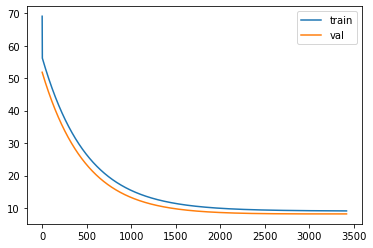

In [6]:
plt.plot(linreg.losses_, label = 'train')
plt.plot(linreg.val_losses_, label = 'val')
plt.legend()

In [7]:
linreg.coefs_, A

(array([[-0.23933064]]), array([[-0.26116351]]))

In [8]:
linreg.intercept_, b

(array([-6.68595826]), -6.873966107579235)

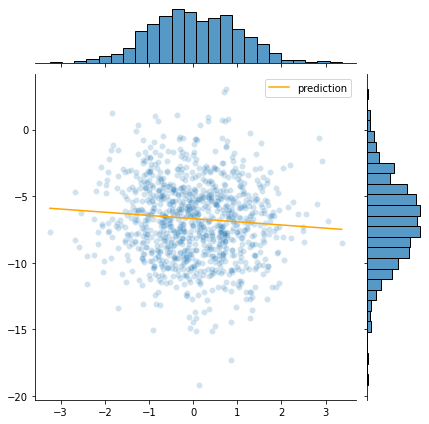

In [9]:
plot = sns.jointplot(x = X.flatten(), y = y.flatten(), joint_kws = dict(alpha = 0.2))
plot.ax_joint.plot([X.min(),X.max()],linreg.predict([X.min(), X.max()]), color = 'orange', label = 'prediction')
plot.ax_joint.legend()

It works! Now lets use our datastes

## load data

In [10]:
df_train=pd.read_csv("data-train - train.csv")
df_test=pd.read_csv("data-test - test.csv")

## Explratory data analysis

In [11]:
df_train.dtypes

avganncount                float64
avgdeathsperyear             int64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
avghouseholdsize           float64
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

### Variable types

int variables are not categories, as we can see, and thus, can be treated as numerical vars or floats

In [12]:
df_train.select_dtypes(int)

,avgdeathsperyear,medincome,popest2015
0,76,40012,27451
1,84,54441,43011
2,325,57719,149568
3,20,42624,6561
4,230,46849,97631
...,...,...,...
2737,26,51754,10897
2738,558,58697,229245
2739,16,82596,10925
2740,21,45997,5306


String variables are not usefull, since binnedinc is a donwsample (or discretization) of a continuous variable "medincome" and using this discretization instead of the continuous value might imply information loss.

"geography" is actually an id, since there are not repetitions of that same values 

In [13]:
df_train.select_dtypes('O')

,binnedinc,geography
0,"(37413.8, 40362.7]","Mineral County, West Virginia"
1,"(51046.4, 54545.6]","Muscatine County, Iowa"
2,"(54545.6, 61494.5]","Monroe County, Michigan"
3,"(40362.7, 42724.4]","Bland County, Virginia"
4,"(45201, 48021.6]","Steuben County, New York"
...,...,...
2737,"(51046.4, 54545.6]","Walsh County, North Dakota"
2738,"(54545.6, 61494.5]","Lake County, Ohio"
2739,"(61494.5, 125635]","Nantucket County, Massachusetts"
2740,"(45201, 48021.6]","Atchison County, Missouri"


In [14]:
df_train['geography'].value_counts()

Mineral County, West Virginia    1
Honolulu County, Hawaii          1
Perry County, Missouri           1
Perry County, Mississippi        1
Jefferson County, Washington     1
                                ..
Park County, Wyoming             1
Canyon County, Idaho             1
Starr County, Texas              1
Adams County, Indiana            1
Fluvanna County, Virginia        1
Name: geography, Length: 2742, dtype: int64

In [15]:
df_train['geography'].nunique() == len(df_train)

True

## Setting variables

In [16]:
target_var = ['target_deathrate']
dropped_vars = ['geography', 'binnedinc']
numerical_vars = [col for col in df_train if not col in dropped_vars + target_var]
categorical_vars = []

## Exploring distributions and correlations

Fill NaNs with [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)

In [17]:
df_train.isna().mean().sort_values()

avganncount                0.000000
pctmarriedhouseholds       0.000000
pctotherrace               0.000000
pctasian                   0.000000
pctblack                   0.000000
pctwhite                   0.000000
pctpubliccoveragealone     0.000000
pctpubliccoverage          0.000000
pctempprivcoverage         0.000000
pctprivatecoverage         0.000000
pctunemployed16_over       0.000000
pctbachdeg25_over          0.000000
pcths25_over               0.000000
pctbachdeg18_24            0.000000
birthrate                  0.000000
target_deathrate           0.000000
pctnohs18_24               0.000000
avgdeathsperyear           0.000000
incidencerate              0.000000
medincome                  0.000000
popest2015                 0.000000
povertypercent             0.000000
studypercap                0.000000
binnedinc                  0.000000
medianage                  0.000000
medianagemale              0.000000
medianagefemale            0.000000
geography                  0

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer().fit(df_train[numerical_vars]) #use with default init params

imputed = imputer.transform(df_train[numerical_vars])
df_train_imputed = df_train.copy()

for i in range(len(numerical_vars)):
    df_train_imputed.loc[:,numerical_vars[i]] = imputed[:, i]

In [19]:
df_train_imputed.isna().mean().sort_values()

avganncount                0.0
pctmarriedhouseholds       0.0
pctotherrace               0.0
pctasian                   0.0
pctblack                   0.0
pctwhite                   0.0
pctpubliccoveragealone     0.0
pctpubliccoverage          0.0
pctempprivcoverage         0.0
pctprivatecoveragealone    0.0
pctprivatecoverage         0.0
pctunemployed16_over       0.0
pctemployed16_over         0.0
pctbachdeg25_over          0.0
pcths25_over               0.0
pctbachdeg18_24            0.0
pctsomecol18_24            0.0
pcths18_24                 0.0
avgdeathsperyear           0.0
incidencerate              0.0
medincome                  0.0
popest2015                 0.0
povertypercent             0.0
studypercap                0.0
birthrate                  0.0
binnedinc                  0.0
medianagemale              0.0
medianagefemale            0.0
geography                  0.0
avghouseholdsize           0.0
percentmarried             0.0
pctnohs18_24               0.0
medianag

In [20]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
avganncount,2742.0,615.856989,1433.570609,6.000000,76.000000,173.000000,532.750000,3.815000e+04
avgdeathsperyear,2742.0,187.976659,510.943653,3.000000,28.000000,61.000000,151.000000,1.401000e+04
incidencerate,2742.0,448.119963,54.440848,211.100000,420.425000,453.549422,480.800000,1.206900e+03
medincome,2742.0,46988.582057,12152.299253,22640.000000,38750.500000,45080.000000,52386.500000,1.256350e+05
popest2015,2742.0,103300.916484,332512.872269,827.000000,11660.250000,26710.000000,69524.500000,1.017029e+07
povertypercent,2742.0,16.900109,6.406914,3.200000,12.200000,15.900000,20.400000,4.740000e+01
studypercap,2742.0,160.281290,547.979242,0.000000,0.000000,0.000000,87.228018,9.762309e+03
medianage,2742.0,45.454996,46.057255,22.300000,37.800000,41.000000,44.100000,6.240000e+02
medianagemale,2742.0,39.588986,5.201666,22.400000,36.400000,39.550000,42.600000,6.470000e+01
medianagefemale,2742.0,42.182677,5.277583,22.300000,39.100000,42.400000,45.400000,6.570000e+01


## Outliers

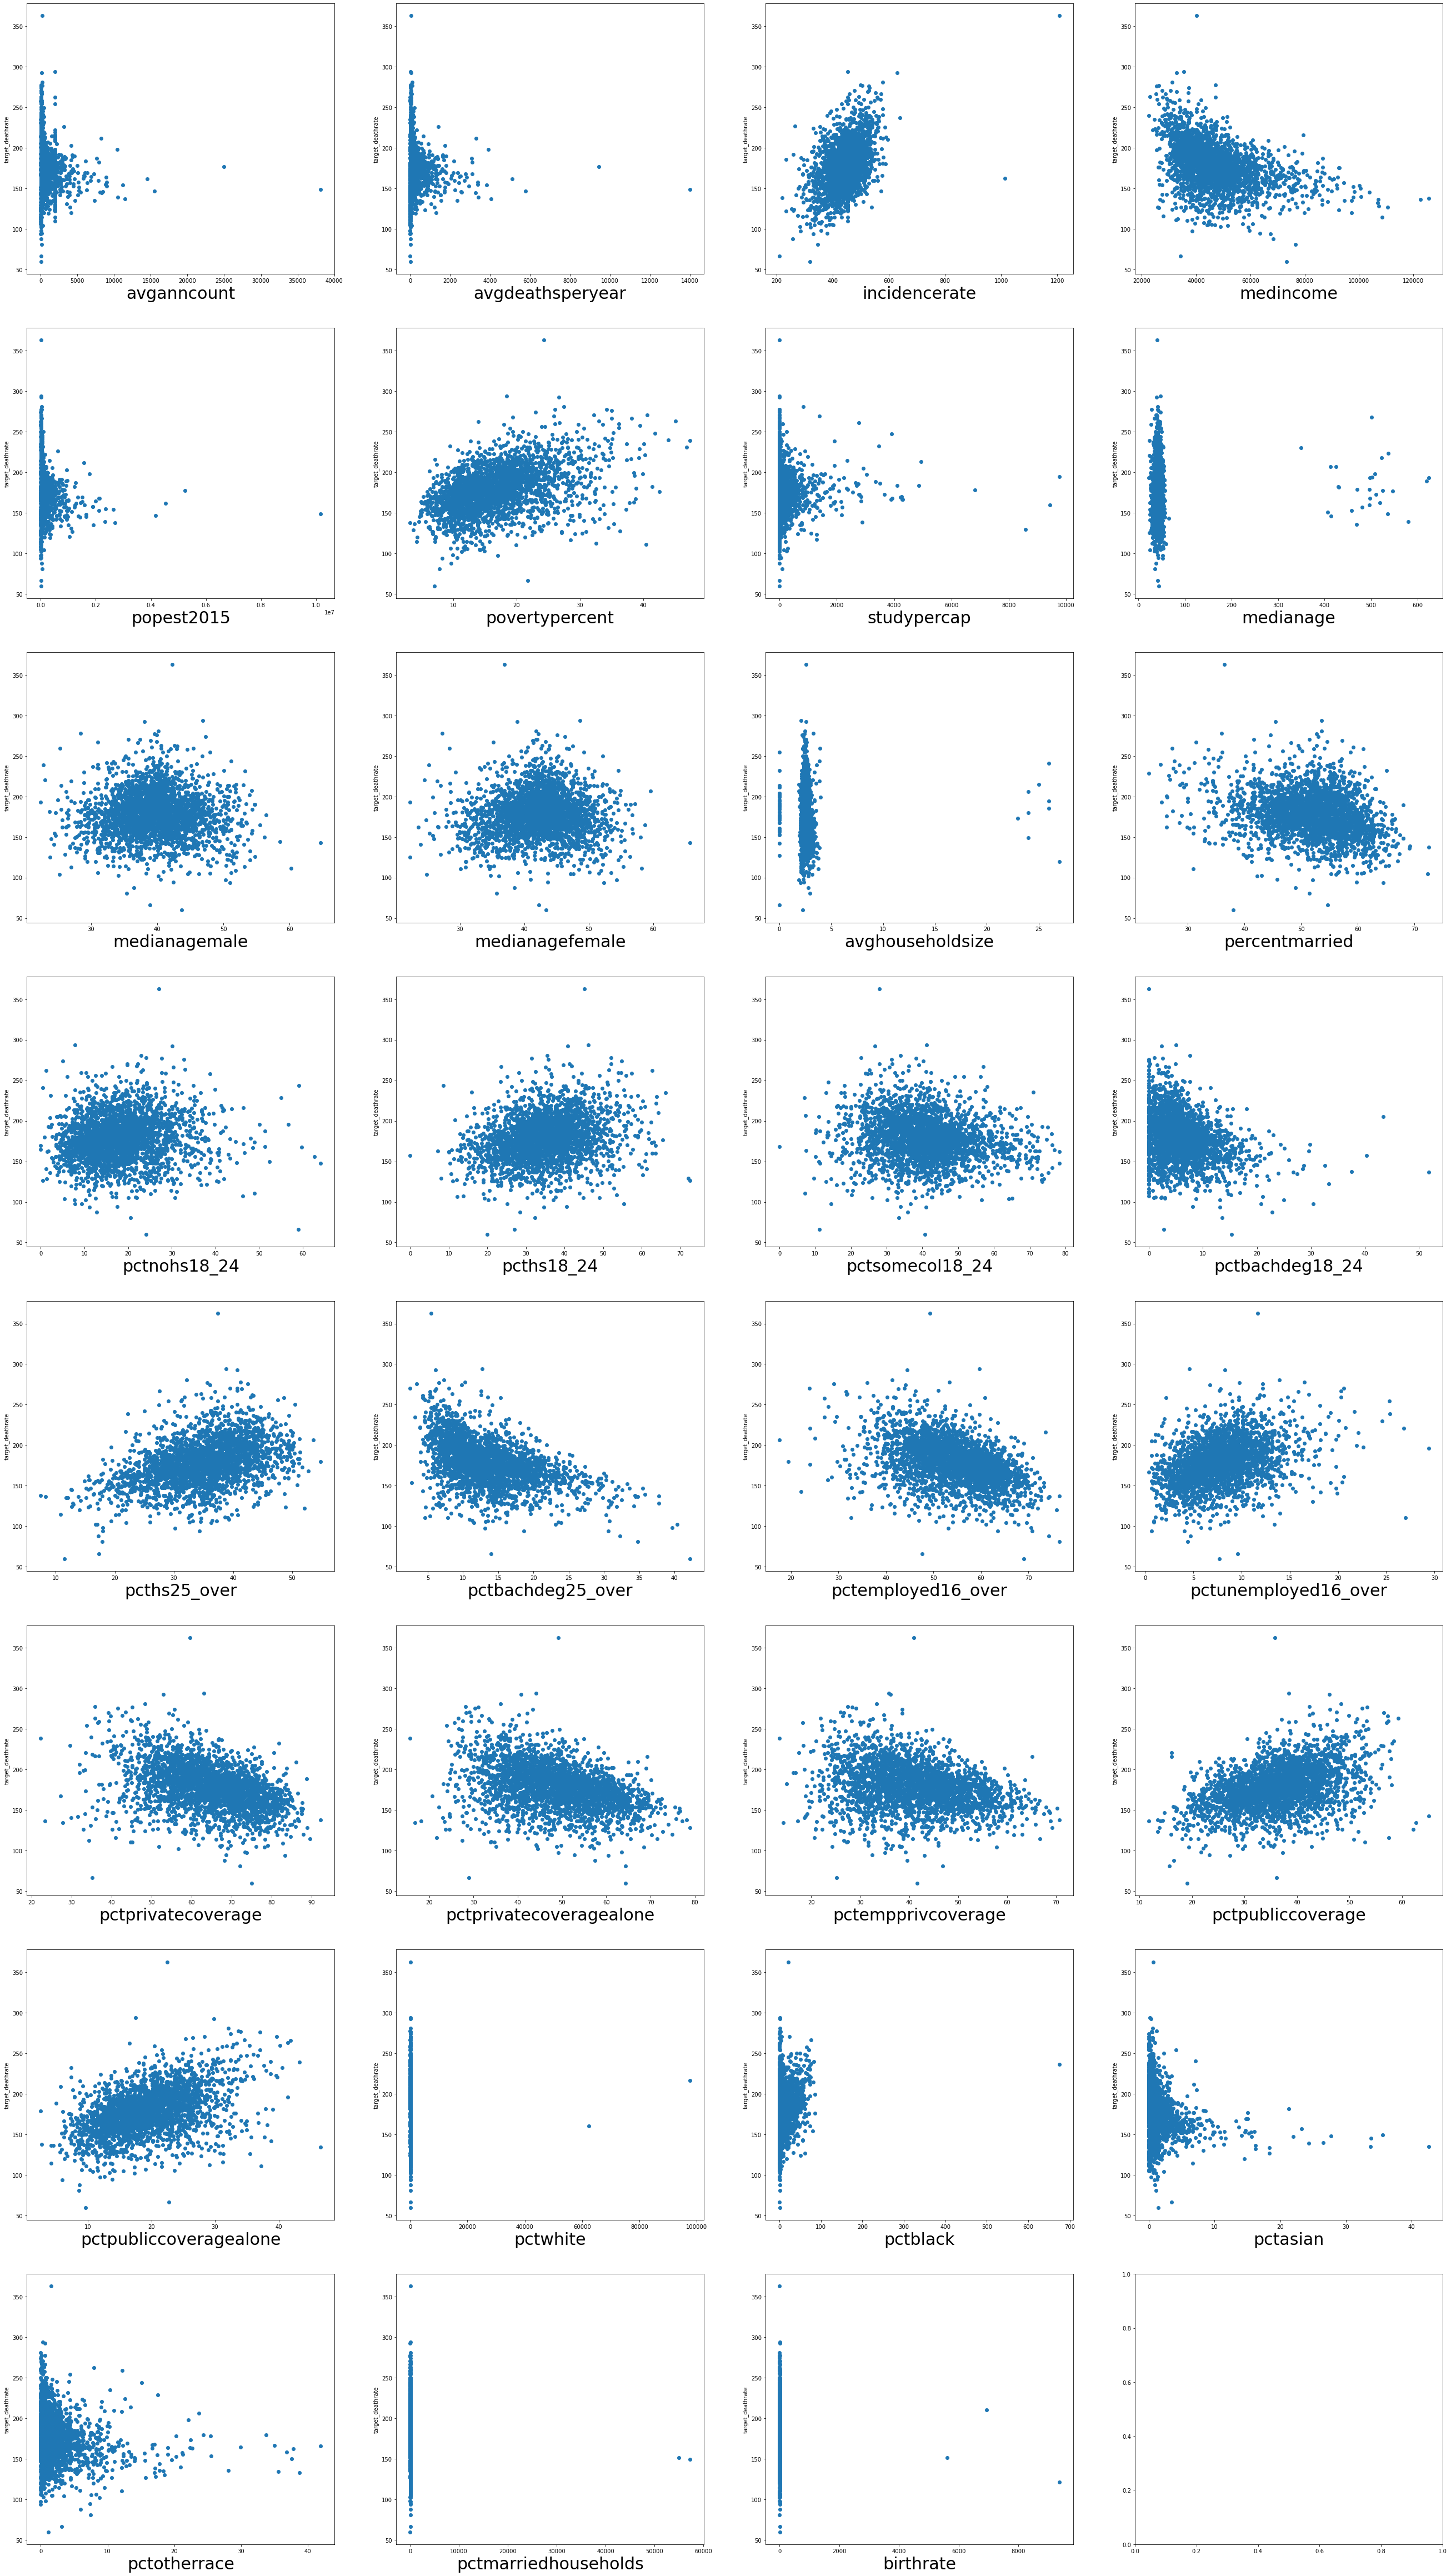

In [21]:
#plots = sns.pairplot(df_train, x_vars = target_var, y_vars = numerical_vars) #transpose vars for better visualizations
ncols = 4
fig, ax = plt.subplots(len(numerical_vars)//ncols+1, ncols)
for i in range(len(numerical_vars)):
    xvar = numerical_vars[i]
    yvar = target_var[0]
    ax[i//ncols,i%ncols].scatter(df_train_imputed[xvar], df_train_imputed[yvar])
    ax[i//ncols,i%ncols].set_xlabel(xvar, fontsize = 30)
    ax[i//ncols,i%ncols].set_ylabel(yvar)
    
    
plt.subplots_adjust(left = -5, bottom = -15)

We can see that there are multiple outliers in data. In order to detect them, we will use a custom ZScore outlier detector, alongside a MarginalOutilerDetector, that performs outlier detection in the marginal distribution of the variables

In [22]:
from sklearn.base import clone, BaseEstimator, OutlierMixin
from sklearn.preprocessing import StandardScaler

class ZScoreDetector(StandardScaler):
    def score_samples(self, X):
        return -abs(self.transform(X).flatten())
    
class MarginalOutilerDetector(OutlierMixin, BaseEstimator):
    '''
    multiple univariate IsolationForests
    '''            
    def __init__(self, detector, contamination = 'auto', strategy = 'all'):
        valid_strategies = ['all', 'feature']
        self.detector = detector
        self.contamination = contamination
        self.strategy = strategy
        return
    
    def fit(self, X, y = None, **kwargs):
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            estimators = [clone(self.detector).fit(X,y,**kwargs)]            
        else:                    
            estimators = [clone(self.detector).fit(x.reshape(-1,1)) for x in X.T]
        
        self.estimators_ = estimators
        return self
    
    def _transform(self, X, transform_method, **kwargs):
        X = np.array(X)
        return np.array([getattr(self.estimators_[i], transform_method)(X[:, i].reshape(-1,1)) for i in range(len(self.estimators_))]).T
        
    def predict(self, X):
        
        strategy = self.strategy        
        
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        preds = self._transform(X, transform_method = 'score_samples')
        
        if strategy == 'all':
            preds = preds.min(axis = 1)
            if self.contamination == 'auto':
                thresh = np.percentile(preds, 5)
            else:
                thresh = np.percentile(preds, self.contamination*100)
        
            preds = ~(preds < thresh)
        
        else:
            all_preds = []
            for i in range(preds.shape[-1]):
                preds_i = preds[:,i]
                if self.contamination == 'auto':
                    thresh = np.percentile(preds_i, 5)
                else:
                    thresh = np.percentile(preds_i, self.contamination*100)

                preds_i = ~(preds_i < thresh)
                all_preds.append(preds_i)            
            
            
            preds = np.array(all_preds).T.all(axis = 1)                
            
        #preds = preds.mean(axis = 1)        
        return preds
    
    def score_samples(self, X):
        return self._transform(X, 'score_samples')
    
    def decision_function(self, X):
        return self._transform(X, 'score_samples')
        

In [144]:
#remove the 5% most extreme points
base_detector = ZScoreDetector()
detector = MarginalOutilerDetector(base_detector, contamination = 0.05, strategy = 'all').fit(df_train_imputed[numerical_vars + target_var])

In [145]:
outliers = detector.predict(df_train_imputed[numerical_vars + target_var])
colors = ['blue' if i else 'red' for i in outliers] 

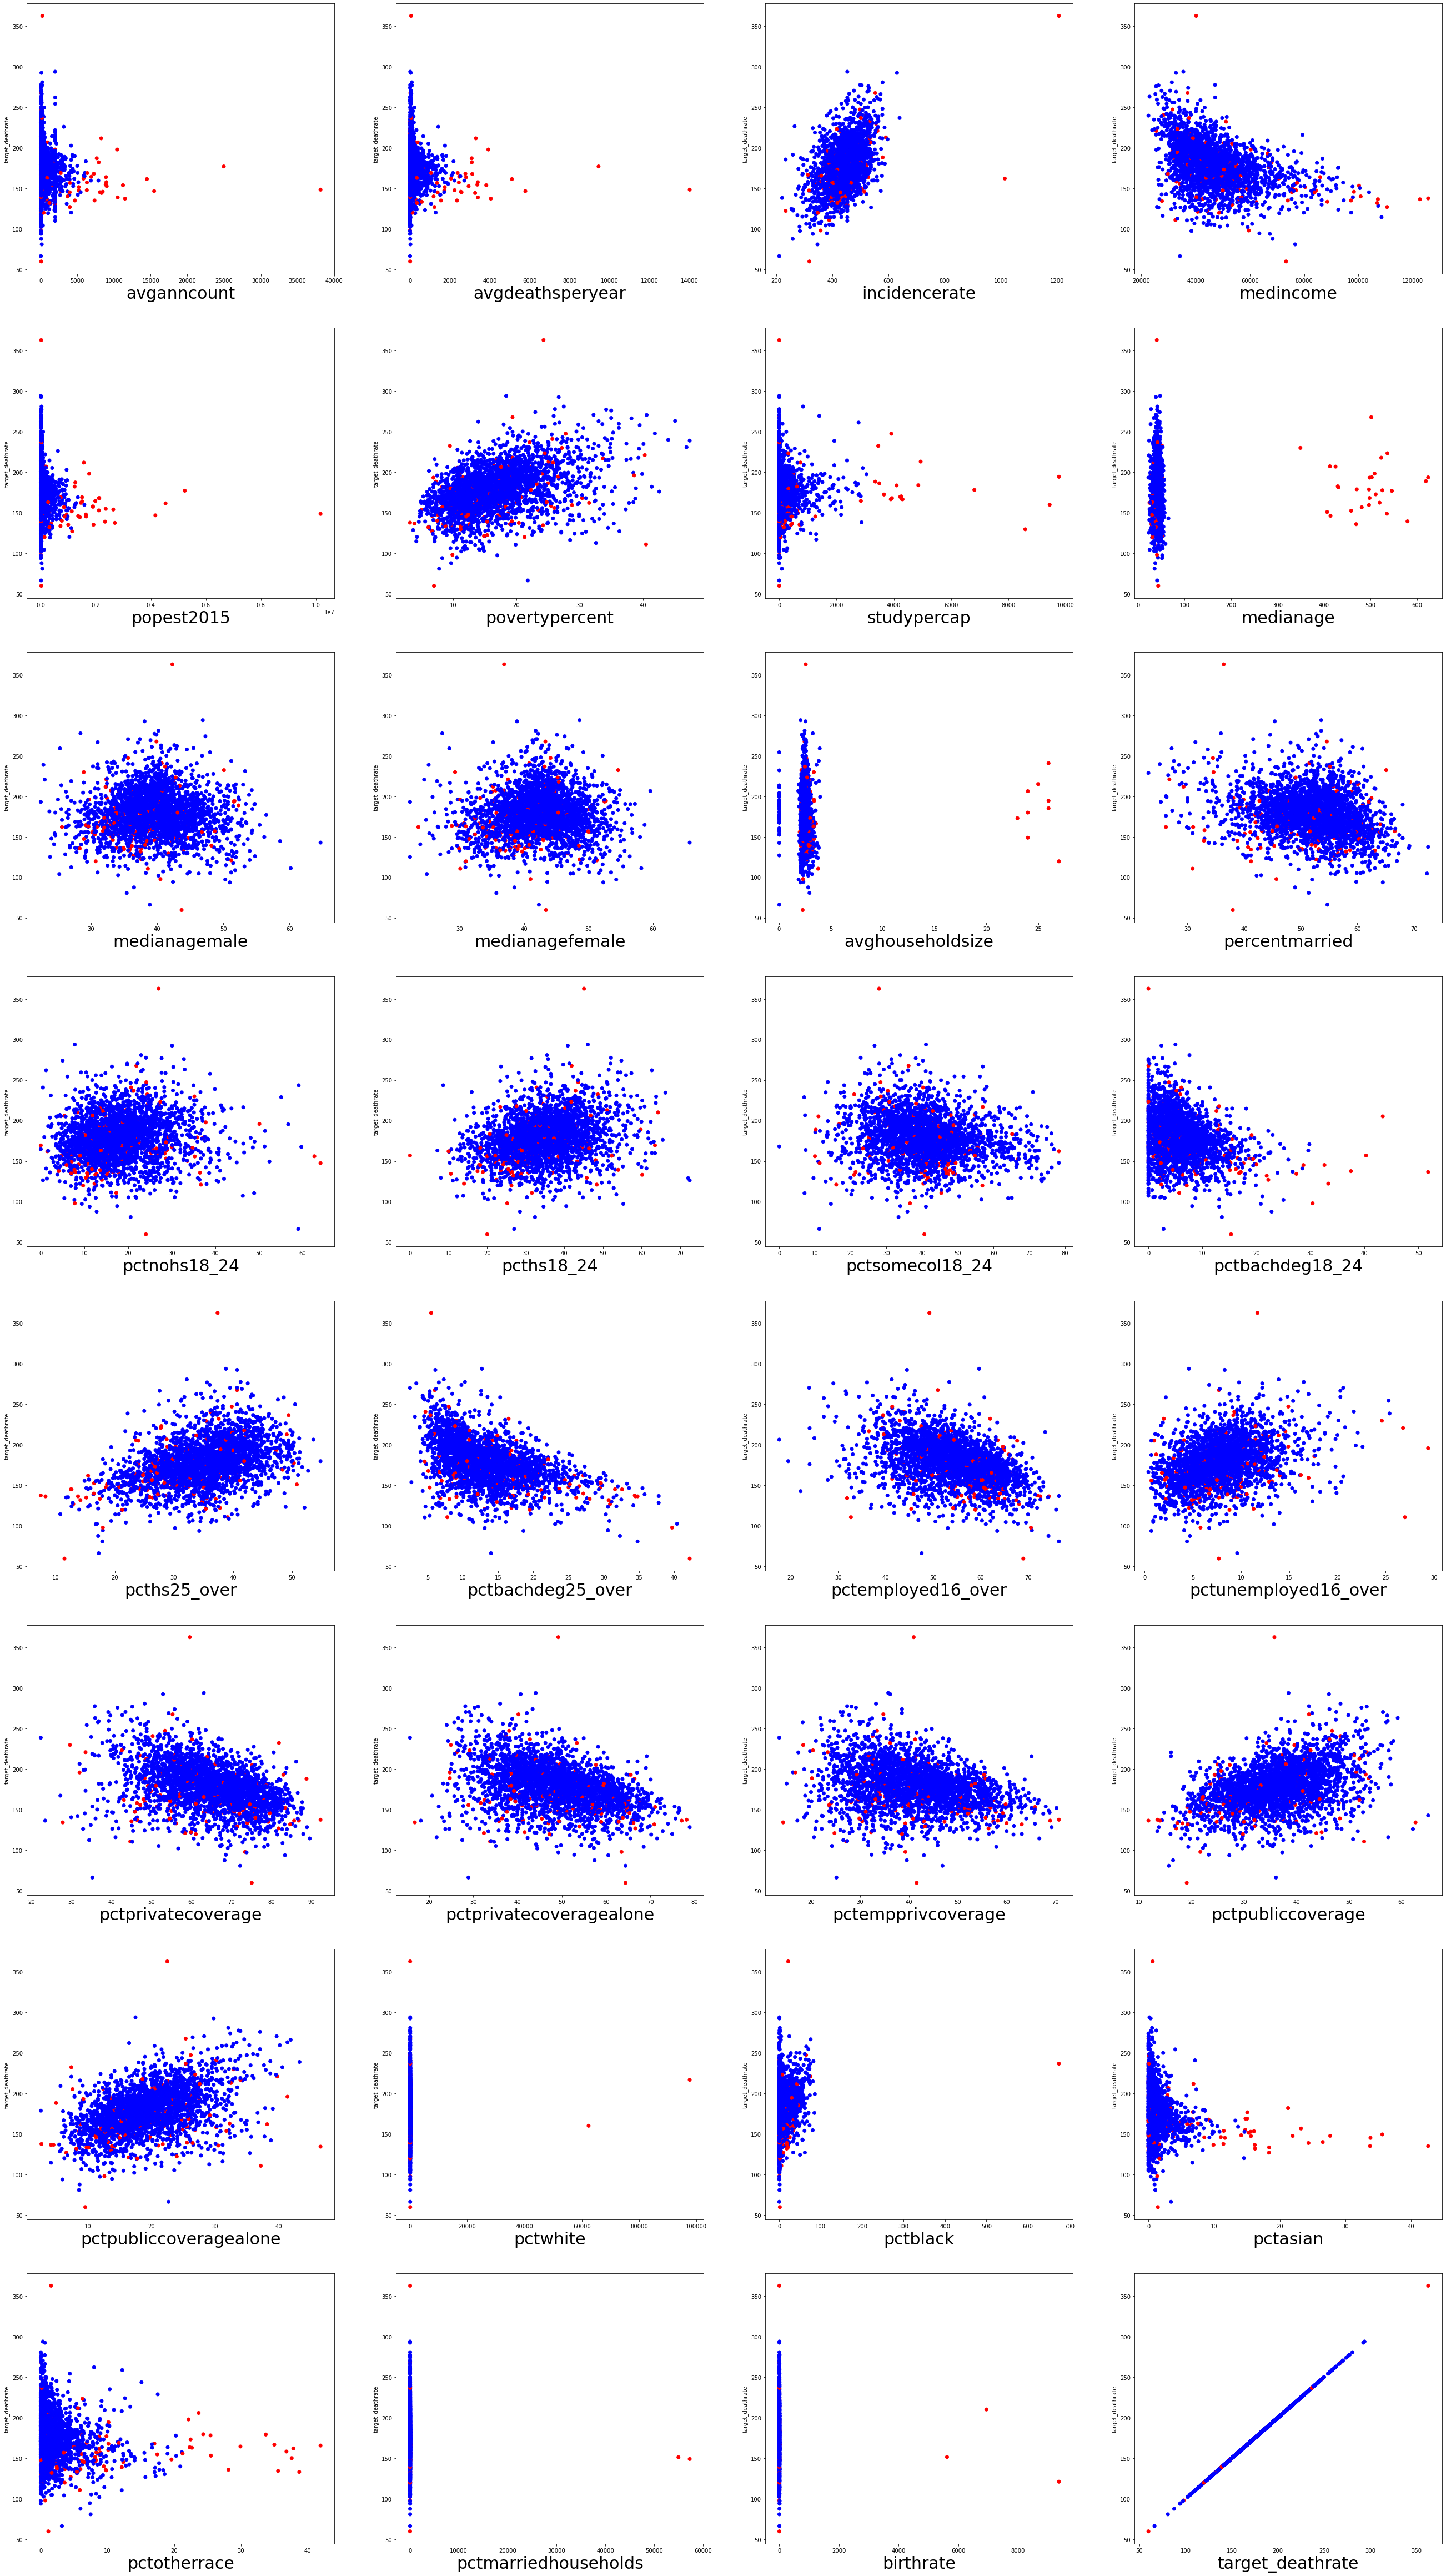

In [146]:
ncols = 4
fig, ax = plt.subplots(len(numerical_vars)//ncols + 1, ncols)
for i in range(len(numerical_vars + target_var)):
    xvar = (numerical_vars + target_var)[i]
    yvar = target_var[0]
    ax[i//ncols,i%ncols].scatter(df_train_imputed[xvar], df_train_imputed[yvar], color = colors)
    ax[i//ncols,i%ncols].set_xlabel(xvar, fontsize = 30)
    ax[i//ncols,i%ncols].set_ylabel(yvar)
    
    
plt.subplots_adjust(left = -5, bottom = -15)

Red dots are detected outliers

## fit Preprocess pipeline  and model

In [147]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler, RobustScaler, MinMaxScaler

#use quantile transformer to force variabules into normal distribution
scaler = QuantileTransformer(1000, 'normal')
prep_pipe = make_pipeline(scaler, IterativeImputer())
prep_pipe.fit(df_train[numerical_vars][outliers], df_train[target_var][outliers])


X_train = prep_pipe.transform(df_train[numerical_vars][outliers])
X_test = prep_pipe.transform(df_test[numerical_vars])

y_train = df_train[target_var][outliers].values
y_test = df_test[target_var].values

custom_linreg = CustomLinearRegression(max_iter = 10000)

custom_linreg.fit(X_train,y_train, val_set = (X_test, y_test))

10001it [00:02, 4244.85it/s]


Text(0, 0.5, 'log(MSE)')

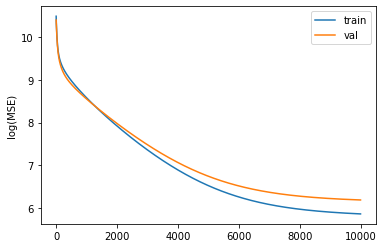

In [148]:
plt.plot(np.log(custom_linreg.losses_), label = 'train')
plt.plot(np.log(custom_linreg.val_losses_), label = 'val')
plt.legend()
plt.ylabel('log(MSE)')

In [149]:
preds_test = custom_linreg.predict(X_test).flatten()

residuals = y_test.flatten() - preds_test

MSE: 488.77029781519093
MAE: 15.461148923232546


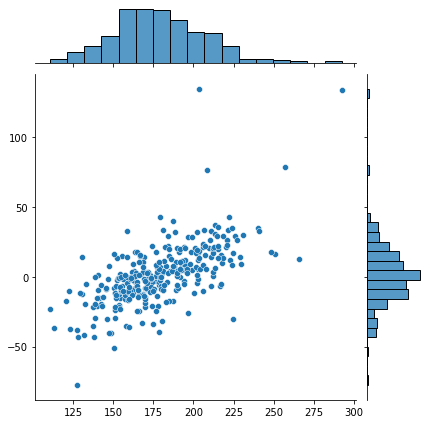

In [176]:
print(f'MSE: {np.mean(residuals**2)}')
print(f'MAE: {np.mean(abs(residuals))}')
sns.jointplot(y_test.flatten(), residuals)


We can see that the residuals are normaly distributed and centered on zero (white noise), but are correlated to y_test, that means that there may be more information to exctract from these features, using some more complex type of regression

In [151]:
import plotly.express as px

feature_importances = pd.DataFrame(custom_linreg.coefs_.T, columns = numerical_vars)

feature_importances = feature_importances.T.sort_values(by = 0).T
fig = px.bar(feature_importances.T, x = 0)
fig.show()

We can see that incidence rate correlates very positively the death rate, while pctbachdeg25_over, maried households, and employment is very negatively correlated with the death rates

In [174]:
# TODO: Linear Regression. You can use scikit-learn libraries.
from sklearn.linear_model import SGDRegressor, LinearRegression


sklearn_linreg = SGDRegressor(alpha = 0, learning_rate = 'constant', eta0 = 1e-3, ) #replicate same parameters as in custom
#sk_pipe = make_pipeline(StandardScaler(), IterativeImputer(), sklearn_linreg)
sklearn_linreg.fit(X_train, y_train)


SGDRegressor(alpha=0, eta0=0.001, learning_rate='constant')

MSE: 579.0837410860797
MAE: 13.455804039691733


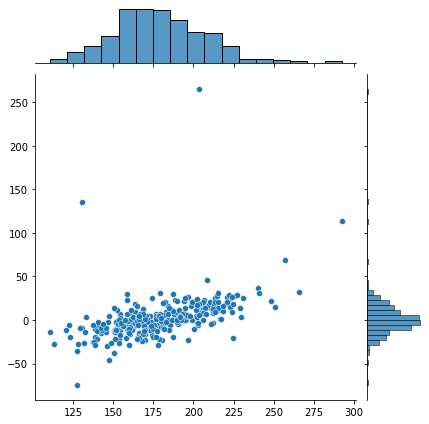

In [175]:
sk_preds_test = sklearn_linreg.predict(X_test).flatten()

sk_residuals = y_test.flatten() - sk_preds_test
print(f'MSE: {np.mean(sk_residuals**2)}')
print(f'MAE: {np.mean(abs(sk_residuals))}')

sns.jointplot(y_test.flatten(), sk_residuals)

Results with sklearns SGDRegressor are worse than customs implementation. Random fluctuations exist, so a better comparisson could be done by running multiple times. Still, this result might be due to minibatch sampling in SGD , while custom implementation runs batches with full data. There might be some learning rate magic to be done so that the sklearn implementation reaches the custom performance, as will be seen in next sessions

Also, MSE is betterr on the custom but MAE is worse, that means the error mean is lower but error median is greater (does not miss by a lot in extreme values but misses moderately more frequently)


> What are the conclusions? (1-2 paragraphs)




2. (2 points) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


Text(0.5, 1.0, 'Loss vs LR for Sklearns SGD')

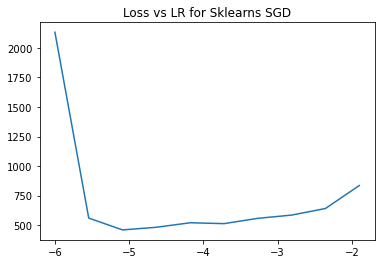

In [165]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.
import warnings
warnings.filterwarnings('ignore')
lrs = np.logspace(-6,-1.9, 10)
mse = []
for lr in lrs:
    sklearn_linreg = SGDRegressor(alpha = 0, learning_rate = 'constant', eta0 = lr, ) #replicate same parameters as in custom
    #sk_pipe = make_pipeline(StandardScaler(), IterativeImputer(), sklearn_linreg)
    sklearn_linreg.fit(X_train, y_train)
    sk_preds_test = sklearn_linreg.predict(X_test).flatten()
    sk_residuals = y_test.flatten() - sk_preds_test
    mse.append(np.mean(sk_residuals**2))
    
plt.plot(np.log10(lrs),mse)
plt.title('Loss vs LR for Sklearns SGD')

10001it [00:02, 4888.73it/s]
10001it [00:02, 4964.26it/s]
10001it [00:02, 4845.08it/s]
10001it [00:02, 4640.42it/s]
3900it [00:00, 4563.60it/s]
233it [00:00, 3698.06it/s]
113it [00:00, 3896.71it/s]
77it [00:00, 3498.89it/s]
59it [00:00, 3687.16it/s]
48it [00:00, 4000.61it/s]


Text(0.5, 1.0, 'Loss vs LR for custom linreg')

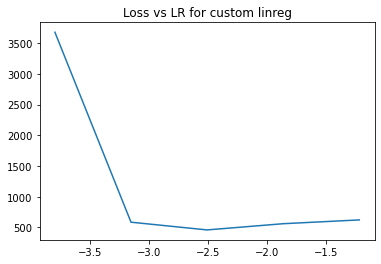

In [191]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.
import warnings
warnings.filterwarnings('ignore')
lrs = np.logspace(-3.8,2, 10)
mse = []
for lr in lrs:
    sklearn_linreg = CustomLinearRegression(learning_rate = lr, tol = 1e-3)
    #sk_pipe = make_pipeline(StandardScaler(), IterativeImputer(), sklearn_linreg)
    sklearn_linreg.fit(X_train, y_train)
    sk_preds_test = sklearn_linreg.predict(X_test).flatten()
    sk_residuals = y_test.flatten() - sk_preds_test
    mse.append(np.mean(sk_residuals**2))
    
plt.plot(np.log10(lrs),mse)

plt.title('Loss vs LR for custom linreg')

We can see that for this problem, the optimal lr is arround 1e-5, while for custom implementation, optimal LR is arround 1e-2. This might be again, due to the fact that when using the entire dataset in the batch, high values of LR wont impact convergence, since when taking the mean of the loss for calculating the gradients, more values, will allow less fluctuations, making the gradient relatively robust to extreme values.


3. (2 points) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


In [182]:
# TODO: Complex model. You can use scikit-learn libraries.
from sklearn.preprocessing import PolynomialFeatures
import inspect
def get_default_args(func):
    '''THANKS TO mgilson at https://stackoverflow.com/questions/12627118/get-a-function-arguments-default-value'''
    signature = inspect.signature(func)
    return {
        k: v.default
        for k, v in signature.parameters.items()
        if v.default is not inspect.Parameter.empty
    }

POLYARGS = get_default_args(PolynomialFeatures)
SGDARGS = get_default_args(SGDRegressor)
ARGS = {**POLYARGS,**SGDARGS}

def PolynomialRegression(**ARGS):
    '''
    creates a polynomial SGD classifier pipeline
    '''
    polyargs = {name:ARGS[name] for name in POLYARGS.keys() if name in ARGS}
    sgdargs = {name:ARGS[name] for name in SGDARGS.keys() if name in ARGS}
    
    poly = PolynomialFeatures(**polyargs)
    sgd = LinearRegression(**sgdargs)
    
    #make pipeline
    polyreg = make_pipeline(poly, sgd)
    return polyreg

def CustomPolynomialRegression(**ARGS):
    '''
    creates a polynomial SGD classifier pipeline
    '''
    polyargs = {name:ARGS[name] for name in POLYARGS.keys() if name in ARGS}
    sgdargs = {name:ARGS[name] for name in SGDARGS.keys() if name in ARGS}
    
    poly = PolynomialFeatures(**polyargs)
    sgd = CustomLinearRegression(**sgdargs)
    
    #make pipeline
    polyreg = make_pipeline(poly, sgd)
    return polyreg


In [186]:
polyreg = PolynomialRegression(degree = 2, , include_bias = False)

In [187]:
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

MSE: 872.8894764159548
MAE: 12.30568524742095


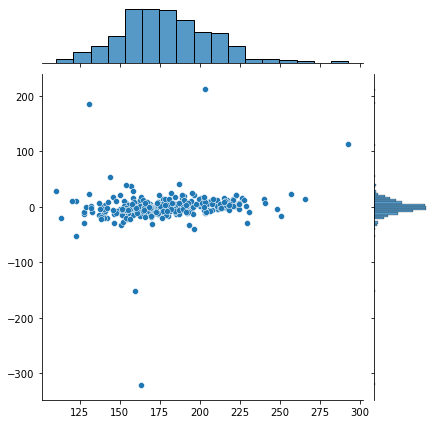

In [188]:
polyreg_preds_test = polyreg.predict(X_test).flatten()

polyreg_residuals = y_test.flatten() - polyreg_preds_test
print(f'MSE: {np.mean(polyreg_residuals**2)}')
print(f'MAE: {np.mean(abs(polyreg_residuals))}')
sns.jointplot(y_test.flatten(), polyreg_residuals)


 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 


We can see that MSE is worse, but MAE is better. We can see in the residuals plot that thar are a few points very far of the errors, this means that degree 2 polynomial regression did great, but it's unfortunately a little sensitive to extreme points or even outilers.

4. (1 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [177]:
# TODO: Plot the cost function vs. number of iterations in the training set.
#in order to do that, we will use customs implementation since it's easier to register the losses during trainning

In [198]:
custompolyreg = CustomPolynomialRegression(degree = 2, include_bias = False).fit(X_train, y_train)




0it [00:00, ?it/s]


17it [00:00, 168.32it/s]


35it [00:00, 173.00it/s]


59it [00:00, 190.83it/s]


78it [00:00, 185.60it/s]


97it [00:00, 183.80it/s]


116it [00:00, 180.53it/s]


136it [00:00, 184.30it/s]


155it [00:00, 184.33it/s]


176it [00:00, 183.68it/s]


195it [00:01, 178.72it/s]


213it [00:01, 177.76it/s]


231it [00:01, 175.37it/s]


249it [00:01, 176.20it/s]


268it [00:01, 179.70it/s]


286it [00:01, 176.46it/s]


305it [00:01, 178.84it/s]


323it [00:01, 174.78it/s]


342it [00:01, 176.61it/s]


365it [00:02, 185.03it/s]


384it [00:02, 182.78it/s]


409it [00:02, 193.54it/s]


429it [00:02, 194.25it/s]


449it [00:02, 185.81it/s]


468it [00:02, 172.11it/s]


486it [00:02, 169.68it/s]


504it [00:02, 172.48it/s]


525it [00:02, 181.96it/s]


544it [00:03, 181.60it/s]


563it [00:03, 174.04it/s]


581it [00:03, 170.01it/s]


599it [00:03, 170.89it/s]


622it [00:03, 181.74it/s]


641it [00:03, 183.02it/s]


660it [00:03, 177.41it/s]


678it [00:03, 172.07it/s]


7

3591it [00:23, 141.80it/s]


3606it [00:23, 140.88it/s]


3623it [00:23, 143.90it/s]


3639it [00:23, 143.40it/s]


3654it [00:24, 145.18it/s]


3669it [00:24, 146.03it/s]


3684it [00:24, 140.63it/s]


3699it [00:24, 143.27it/s]


3715it [00:24, 141.26it/s]


3730it [00:24, 143.59it/s]


3747it [00:24, 144.80it/s]


3762it [00:24, 142.60it/s]


3778it [00:24, 144.37it/s]


3794it [00:24, 145.63it/s]


3809it [00:25, 146.86it/s]


3825it [00:25, 144.17it/s]


3840it [00:25, 142.39it/s]


3855it [00:25, 143.94it/s]


3870it [00:25, 145.22it/s]


3885it [00:25, 146.33it/s]


3900it [00:25, 147.27it/s]


3915it [00:25, 141.37it/s]


3930it [00:25, 142.80it/s]


3946it [00:26, 141.97it/s]


3961it [00:26, 140.27it/s]


3976it [00:26, 142.58it/s]


3991it [00:26, 140.28it/s]


4006it [00:26, 140.12it/s]


4021it [00:26, 132.62it/s]


4035it [00:26, 131.16it/s]


4052it [00:26, 136.05it/s]


4067it [00:26, 139.61it/s]


4082it [00:27, 139.31it/s]


4096it [00:27, 137.18it/s]


4110it [00:27,

6796it [00:46, 155.25it/s]


6812it [00:46, 149.82it/s]


6828it [00:46, 147.32it/s]


6843it [00:46, 141.40it/s]


6858it [00:47, 136.30it/s]


6872it [00:47, 132.17it/s]


6886it [00:47, 132.57it/s]


6903it [00:47, 141.60it/s]


6918it [00:47, 138.91it/s]


6932it [00:47, 138.54it/s]


6947it [00:47, 141.66it/s]


6962it [00:47, 138.86it/s]


6977it [00:47, 140.23it/s]


6993it [00:48, 144.31it/s]


7008it [00:48, 140.87it/s]


7025it [00:48, 143.29it/s]


7042it [00:48, 150.12it/s]


7058it [00:48, 147.89it/s]


7073it [00:48, 143.50it/s]


7090it [00:48, 147.14it/s]


7107it [00:48, 152.59it/s]


7123it [00:48, 148.36it/s]


7138it [00:49, 142.88it/s]


7154it [00:49, 147.35it/s]


7169it [00:49, 141.68it/s]


7184it [00:49, 138.27it/s]


7201it [00:49, 145.44it/s]


7217it [00:49, 147.53it/s]


7232it [00:49, 144.51it/s]


7247it [00:49, 141.22it/s]


7262it [00:49, 137.97it/s]


7277it [00:50, 140.81it/s]


7292it [00:50, 137.32it/s]


7306it [00:50, 137.43it/s]


7324it [00:50,

803it [02:09,  6.19it/s] 
0it [02:32, ?it/s]


Text(0, 0.5, 'log(MSE)')

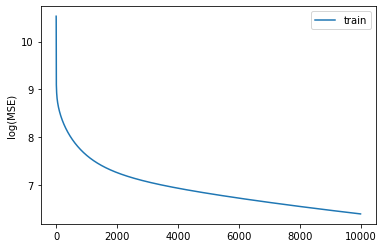

In [200]:
plt.plot(np.log(custompolyreg[1].losses_), label = 'train')

plt.legend()
plt.ylabel('log(MSE)')

> What are the conclusions? (2-4 paragraphs)


We can see that the training loss, even after 10.000 batches with the full data hasnt reached a plaateau (actually its still very steep, even for log scale), that means that with more features (polynomial features), there are more parameters in which the optimization process can use to overfit the train set

## Deadline

Monday, October 11th 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you did, your grade will be penalized as follows:
- October 12th 11:59 pm : grade * 0.75
- October 13th 11:59 pm : grade * 0.5
- October 14th 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**